# Oppgave a)

In [89]:
cd ..

c:\Users\leand\FYS-STK\FYS-STK3155-project-2


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [91]:
# import functions from src folder
import src.regression_tools as rt
import src.regression_cost_funcs as rcf
import src.gradient_descent as gd
import src.data_generation as dg

In [92]:
#generate data
N = 1000 #nr of data points
x, y, z, true_z = dg.generate_data_Franke(N=N, sigma2=0.01, seed=0)

poly_grad = 5
X = rt.create_X_polynomial(x, y, poly_grad)

# Split data:
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.25)

## Analysis MSE developmens over epochs for different learning-rate 

In [93]:
# We want to models of gradient decent, high and low learning-rate
lr1 = 0.1
lr2 = 0.01

#choose cost function model to investigate:
model = rcf.OLSCost()

descent1 = gd.GradientDescent(mode="normal", momentum_param=0, batch_size=None, store_extra=True)
descent2 = gd.GradientDescent(mode="normal", momentum_param=0, batch_size=None, store_extra=True)

#choose initial weigths and number of epochs
w_init = np.zeros(len(X[0]))
epochs = 2000

#train on the train data and return final weights
w1 = descent1.train(X_train, w_init, z_train, model, learning_rate=lr1, n_epochs = epochs)
w2 = descent2.train(X_train, w_init, z_train, model, learning_rate=lr2, n_epochs = epochs)

#extract weights as a function of epocs
wlog1 = descent1.weights 
wlog2 = descent2.weights 

In [94]:
# Maby make it as a function:

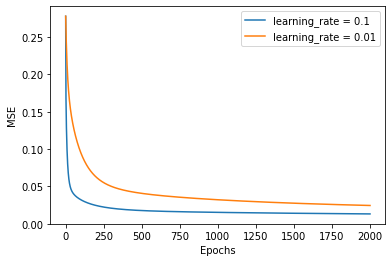

In [95]:
epoc_arr = np.linspace(0, epochs, epochs+1)

# y_pred as an array corrosponding to predictiv y for each epoch 
z_pred_test1 = (X_test@wlog1.T).T
z_pred_train1 = (X_train@wlog1.T).T
MSE_test1 = rt.MSE_vec(z_test, z_pred_test1)
MSE_train1 = rt.MSE_vec(z_train, z_pred_train1)

# 
z_pred_test2 = (X_test@wlog2.T).T
z_pred_train2 = (X_train@wlog2.T).T
MSE_test2= rt.MSE_vec(z_test, z_pred_test2)
MSE_train2 = rt.MSE_vec(z_train, z_pred_train2)

plt.plot(epoc_arr, MSE_test1, label=f"learning_rate = {lr1}")
plt.plot(epoc_arr, MSE_test2, label=f"learning_rate = {lr2}")
# plt.plot(epoc_arr, MSE_train1, label=f"learning_rate_train = {lr1}")
# plt.plot(epoc_arr, MSE_train2, label=f"learning_rate_train = {lr2}")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()


In [81]:
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error

# SKlearn implementation of the same model, with learning rate 0.1 and 0.01

epochs = 2000
lr1 = 0.1
lr2 = 0.01

MSE1 = []
MSE2 = []

progress = 0

for e in range(1, epochs + 1):
    progress += 100/epochs
    print(f"Progress: {progress:.2f}%", end="\r")
    mod1 = skl.SGDRegressor(loss="squared_error", max_iter=e, tol=None, learning_rate="invscaling", eta0=lr1)
    mod2 = skl.SGDRegressor(loss="squared_error", max_iter=e, tol=None, learning_rate="invscaling", eta0=lr2)
    mod1.fit(X_train, z_train)
    mod2.fit(X_train, z_train)
    z_pred1 = mod1.predict(X_test)
    z_pred2 = mod2.predict(X_test)
    MSE1.append(mean_squared_error(z_test, z_pred1))
    MSE2.append(mean_squared_error(z_test, z_pred2))

plt.plot(epoc_arr, MSE1, label=f"learning_rate = {lr1}")
plt.plot(epoc_arr, MSE2, label=f"learning_rate = {lr2}")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()




NameError: name 'epoc_arr' is not defined

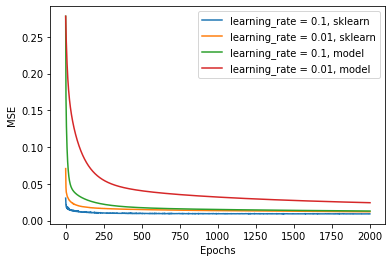

In [97]:
plt.plot(epoc_arr[:-1], MSE1, label=f"learning_rate = {lr1}, sklearn")
plt.plot(epoc_arr[:-1], MSE2, label=f"learning_rate = {lr2}, sklearn")
plt.plot(epoc_arr, MSE_test1, label=f"learning_rate = {lr1}, model")
plt.plot(epoc_arr, MSE_test2, label=f"learning_rate = {lr2}, model")
# plt.plot(epoc_arr, MSE_train1, label=f"learning_rate_train = {lr1}")
# plt.plot(epoc_arr, MSE_train2, label=f"learning_rate_train = {lr2}")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

## Analysis MSE over learning rate - Fixed n_epochs

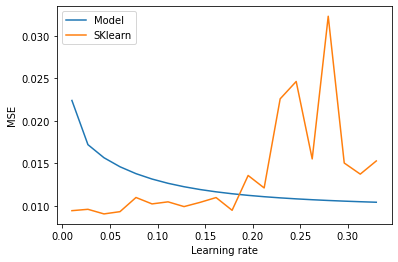

In [99]:

def lr_iter(X, z, lr_range, seed=0):
    """ """
    # Split data:
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.25, random_state=seed)

    MSE_array = np.zeros(len(lr_range))
    MSE_array_skl = np.zeros(len(lr_range))
    for i, lr in enumerate(lr_range):
        w_init = np.zeros(len(X_train[0]))
        epochs = 3000
        descent = gd.GradientDescent(mode="normal", momentum_param=0, batch_size=None, store_extra=False)
        w = descent.train(X_train, w_init, z_train, model, learning_rate=lr, n_epochs = epochs)
        z_pred_test = (X_test @ w)
        MSE_array[i] = rt.MSE(z_test, z_pred_test.flatten())
        # Compare with SKlearn
        mod = skl.SGDRegressor(loss="squared_error", max_iter=epochs, tol=None, learning_rate="constant", eta0=lr)
        mod.fit(X_train, z_train)
        z_pred = mod.predict(X_test)
        MSE_array_skl[i] = mean_squared_error(z_test, z_pred)
    return MSE_array, MSE_array_skl


# create linspace learning-rate
learning_rate_range = np.linspace(0.01, 0.33, 20)
MSE_arr, MSE_arr_skl = lr_iter(X_train, z_train, learning_rate_range)
plt.plot(learning_rate_range, MSE_arr)
plt.plot(learning_rate_range, MSE_arr_skl)
plt.xlabel("Learning rate")
plt.ylabel("MSE")
plt.legend(["Model", "SKlearn"])
plt.show()

# CHOICE: Choose learning-rate to be 0.3 for the rest of the exercise


## Analyze MSE development over epochs for different batch-sizes

In [9]:
# We want two models of gradient decent; None, large and small batch sizes
b1 = None
b2 = 512
b3 = 128

#choose cost function model to investigate:
model = rcf.OLSCost()

descent1 = gd.GradientDescent(mode="normal", momentum_param=0, batch_size=b1, store_extra=True)
descent2 = gd.GradientDescent(mode="normal", momentum_param=0, batch_size=b2, store_extra=True)
descent3 = gd.GradientDescent(mode="normal", momentum_param=0, batch_size=b3, store_extra=True)


#choose initial weigths and number of epochs
w_init = np.zeros(len(X[0]))
epochs = 250

#train on the train data and return final weights
w1 = descent1.train(X_train, w_init, z_train, model, learning_rate=0.3, n_epochs = epochs)
w2 = descent2.train(X_train, w_init, z_train, model, learning_rate=0.3, n_epochs = epochs)
w3 = descent3.train(X_train, w_init, z_train, model, learning_rate=0.3, n_epochs = epochs)


#extract weights as a function of epocs
wlog1 = descent1.weights 
wlog2 = descent2.weights 
wlog3 = descent3.weights

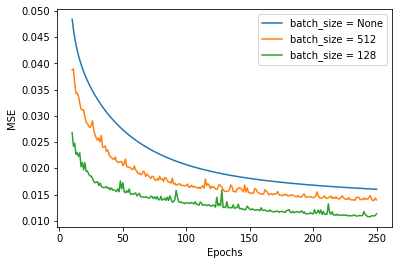

In [10]:
epoc_arr = np.linspace(0, epochs, epochs+1)

# y_pred as an array corrosponding to predictiv y for each epoch 
z_pred_test1 = (X_test@wlog1.T).T
z_pred_train1 = (X_train@wlog1.T).T
MSE_test1 = rt.MSE_vec(z_test, z_pred_test1)
MSE_train1 = rt.MSE_vec(z_train, z_pred_train1)

# 
z_pred_test2 = (X_test@wlog2.T).T
z_pred_train2 = (X_train@wlog2.T).T
MSE_test2= rt.MSE_vec(z_test, z_pred_test2)
MSE_train2 = rt.MSE_vec(z_train, z_pred_train2)

# 
z_pred_test3 = (X_test@wlog3.T).T
z_pred_train3 = (X_train@wlog3.T).T
MSE_test3 = rt.MSE_vec(z_test, z_pred_test3)
MSE_train3 = rt.MSE_vec(z_train, z_pred_train3)

plt.plot(epoc_arr[10:], MSE_test1[10:], label=f"batch_size = {b1}")
plt.plot(epoc_arr[10:], MSE_test2[10:], label=f"batch_size = {b2}")
plt.plot(epoc_arr[10:], MSE_test3[10:], label=f"batch_size = {b3}")
# plt.plot(epoc_arr, MSE_train1, label=f"learning_rate_train = {lr1}")
# plt.plot(epoc_arr, MSE_train2, label=f"learning_rate_train = {lr2}")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()




## Analysis MSE over batch size - Fixed epochs

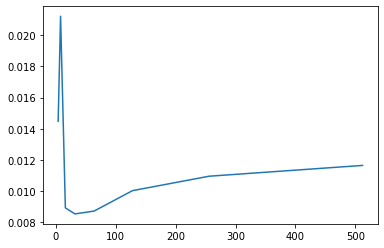

In [11]:
def batch_iter(X, z, b_range, seed=1):
    """ """
    np.random.seed(seed)
    # Split data:
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.25, random_state=seed)

    MSE_array = np.zeros(len(b_range))
    MSE_array_skl = np.zeros(len(b_range))
    for i, b in enumerate(b_range):
        w_init = np.zeros(len(X_train[0]))
        epochs = 250
        descent = gd.GradientDescent(mode="normal", momentum_param=0, batch_size=b, store_extra=False)
        w = descent.train(X_train, w_init, z_train, model, learning_rate=0.3, n_epochs = epochs)
        z_pred_test = (X_test @ w)
        MSE_array[i] = rt.MSE(z_test, z_pred_test.flatten())
    return MSE_array


# create linspace learning-rate
batch_range = np.array([4, 8, 16, 32, 64, 128, 256, 512])
#batch_range = np.linspace(10, 510, 500, dtype=int)
MSE_arr= batch_iter(X_train, z_train, batch_range)
plt.plot(batch_range, MSE_arr)
plt.xlabel("Batch size")
plt.ylabel("MSE")
plt.show()

# CHOICE: Choose batch size to be 128 for the rest of the exercise to avoide noise, see plot over for details.
# Note : should be power of 2.

## Analysis of momentum

In [12]:
batch_size = None

# We want two models of gradient decent; None, large and small batch sizes
m1 = 0
m2 = 0.25
m3 = 0.75

#choose cost function model to investigate:
model = rcf.OLSCost()

descent1 = gd.GradientDescent(mode="normal", momentum_param=m1, batch_size=batch_size, store_extra=True)
descent2 = gd.GradientDescent(mode="normal", momentum_param=m2, batch_size=batch_size, store_extra=True)
descent3 = gd.GradientDescent(mode="normal", momentum_param=m3, batch_size=batch_size, store_extra=True)


#choose initial weigths and number of epochs
w_init = np.zeros(len(X[0]))
epochs = 2250

#train on the train data and return final weights
w1 = descent1.train(X_train, w_init, z_train, model, learning_rate=0.3, n_epochs = epochs)
w2 = descent2.train(X_train, w_init, z_train, model, learning_rate=0.3, n_epochs = epochs)
w3 = descent3.train(X_train, w_init, z_train, model, learning_rate=0.3, n_epochs = epochs)


#extract weights as a function of epocs
wlog1 = descent1.weights 
wlog2 = descent2.weights 
wlog3 = descent3.weights

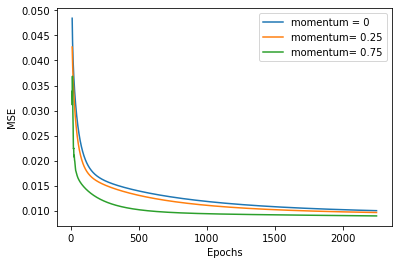

In [13]:
epoc_arr = np.linspace(0, epochs, epochs+1)

# y_pred as an array corrosponding to predictiv y for each epoch 
z_pred_test1 = (X_test@wlog1.T).T
z_pred_train1 = (X_train@wlog1.T).T
MSE_test1 = rt.MSE_vec(z_test, z_pred_test1)
MSE_train1 = rt.MSE_vec(z_train, z_pred_train1)

# 
z_pred_test2 = (X_test@wlog2.T).T
z_pred_train2 = (X_train@wlog2.T).T
MSE_test2= rt.MSE_vec(z_test, z_pred_test2)
MSE_train2 = rt.MSE_vec(z_train, z_pred_train2)

# 
z_pred_test3 = (X_test@wlog3.T).T
z_pred_train3 = (X_train@wlog3.T).T
MSE_test3 = rt.MSE_vec(z_test, z_pred_test3)
MSE_train3 = rt.MSE_vec(z_train, z_pred_train3)

plt.plot(epoc_arr[10:], MSE_test1[10:], label=f"momentum = {m1}")
plt.plot(epoc_arr[10:], MSE_test2[10:], label=f"momentum= {m2}")
plt.plot(epoc_arr[10:], MSE_test3[10:], label=f"momentum= {m3}")
# plt.plot(epoc_arr, MSE_train1, label=f"learning_rate_train = {lr1}")
# plt.plot(epoc_arr, MSE_train2, label=f"learning_rate_train = {lr2}")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

### Analysis momentum - MSE as a function of momentum

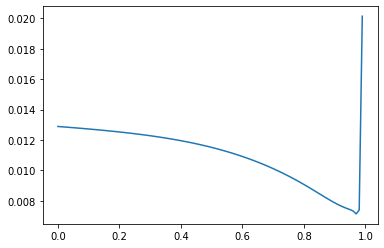

In [100]:
def momentum_iter(X, z, m_range, seed=1):
    """ """
    np.random.seed(seed)
    # Split data:
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.25, random_state=seed)

    MSE_array = np.zeros(len(m_range))
    MSE_array_skl = np.zeros(len(m_range))
    for i, m in enumerate(m_range):
        w_init = np.zeros(len(X_train[0]))
        epochs = 250
        descent = gd.GradientDescent(mode="normal", momentum_param=m, batch_size=None, store_extra=False)
        w = descent.train(X_train, w_init, z_train, model, learning_rate=0.3, n_epochs = epochs)
        z_pred_test = (X_test @ w)
        MSE_array[i] = rt.MSE(z_test, z_pred_test.flatten())
    return MSE_array


# create linspace learning-rate
momentum_range = np.linspace(0, 0.99, 100)
MSE_arr = momentum_iter(X_train, z_train, momentum_range)
plt.plot(momentum_range, MSE_arr)
plt.show()

# CHOICE: Choose momentum=0.9 for the rest of this exersice

This analasys gives a estimate of an optimal model whith the following parameters:
Learning rate $= 0.3$
Batch size $= 128$
Momentum $= 0.9$
Theese where found only by looking at what we saw as resonoble parameters in our plots,
to do a more detatailed search for parameters one would do a grid search.

## Grid-search for parameters on an Ridge model

Status: funker, men fobedringspotensiale.

In [63]:
def grid_search(X, z, lambda_range, lr_range, mode="normal"):
    
    X_train, X_test, X_validation = X
    z_train, z_test, z_validation = z
    
    #set mini-bach size
    batch_size = 256
    #set nr of epochs
    epochs = 2000
    #set momentum
    m = 0.9
    
    optimal = [None, None]
    optimal_MSE = 1000
    MSE_grid = np.zeros((len(lambda_range), len(lr_range)))
    
    progress = 0
    
    for num1, i in enumerate(lambda_range):
        model = rcf.RidgeCost(i)
        progress += 100/len(lambda_range)
        for num2, j in enumerate(lr_range):
            #init weights
            w_init = np.zeros(len(X_train[0]))
            #Make model with i and j param
            descent = gd.GradientDescent(mode=mode, momentum_param=m, batch_size=batch_size, store_extra=False)
            w = descent.train(X_train, w_init, z_train, model, learning_rate=j, n_epochs = epochs)
            #calculate MSE 
            mse = rt.MSE(z_test, X_test@w)
            if mse<optimal_MSE:
                optimal_MSE = mse
                optimal = [i, j]
            MSE_grid[num2, num1] = mse
        print(f"progress = {progress:.2f}%")
    return optimal, optimal_MSE, MSE_grid

In [64]:
X = (X_train, X_test, 0)
z = (z_train, z_test, 0)
lamda_range = np.linspace(0.01, 0.1 , 15)
lr_range = np.linspace(0, 0.9, 15)

rms_prop_opt = grid_search(X, z, lamda_range, lr_range, mode="rmsprop")
adagrad_prop_opt = grid_search(X, z, lamda_range, lr_range, mode="adagrad")
adam_prop_opt = grid_search(X, z, lamda_range, lr_range, mode="adam")

progress = 6.67%
progress = 13.33%
progress = 20.00%
progress = 26.67%
progress = 33.33%
progress = 40.00%
progress = 46.67%
progress = 53.33%
progress = 60.00%
progress = 66.67%
progress = 73.33%
progress = 80.00%
progress = 86.67%
progress = 93.33%
progress = 100.00%
progress = 6.67%
progress = 13.33%
progress = 20.00%
progress = 26.67%
progress = 33.33%
progress = 40.00%
progress = 46.67%
progress = 53.33%
progress = 60.00%
progress = 66.67%
progress = 73.33%
progress = 80.00%
progress = 86.67%
progress = 93.33%
progress = 100.00%
progress = 6.67%
progress = 13.33%
progress = 20.00%
progress = 26.67%
progress = 33.33%
progress = 40.00%
progress = 46.67%
progress = 53.33%
progress = 60.00%
progress = 66.67%
progress = 73.33%
progress = 80.00%
progress = 86.67%
progress = 93.33%
progress = 100.00%


In [65]:
import matplotlib.colors as colors

X = (X_train, X_test, 0)
z = (z_train, z_test, 0)
lamda_range = np.linspace(0.01, 0.1 , 15)
lr_range = np.linspace(0, 0.9, 15)

rms_prop_opt = grid_search(X, z, lamda_range, lr_range, mode="rmsprop")
M, N = np.meshgrid(lamda_range, lr_range)

progress = 6.67%
progress = 13.33%
progress = 20.00%
progress = 26.67%
progress = 33.33%
progress = 40.00%
progress = 46.67%
progress = 53.33%
progress = 60.00%
progress = 66.67%
progress = 73.33%
progress = 80.00%
progress = 86.67%
progress = 93.33%
progress = 100.00%


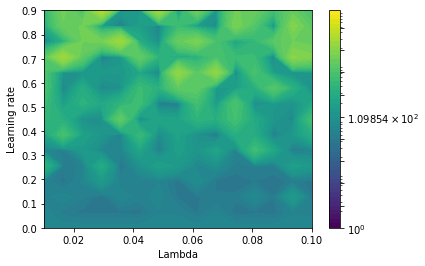

In [66]:
# Make a plot with more levels at low values with 50 levels
plt.contourf(M, N, rms_prop_opt[2], cmap="viridis", norm=colors.LogNorm(), levels=np.logspace(0, 4, 50))
plt.colorbar()
plt.xlabel("Lambda")
plt.ylabel("Learning rate")
plt.show()

In [67]:
X = (X_train, X_test, 0)
z = (z_train, z_test, 0)
lamda_range = np.linspace(0.01, 0.1 , 15)
lr_range = np.linspace(0, 0.9, 15)

ada_prop_opt = grid_search(X, z, lamda_range, lr_range, mode="adagrad")
M, N = np.meshgrid(lamda_range, lr_range)

progress = 6.67%
progress = 13.33%
progress = 20.00%
progress = 26.67%
progress = 33.33%
progress = 40.00%
progress = 46.67%
progress = 53.33%
progress = 60.00%
progress = 66.67%
progress = 73.33%
progress = 80.00%
progress = 86.67%
progress = 93.33%
progress = 100.00%


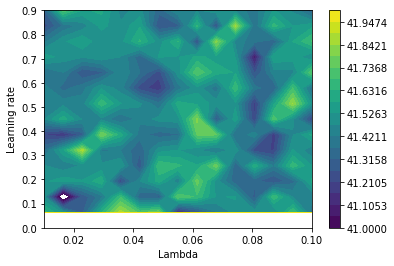

In [68]:
# Make a plot with 20 levels between 41 and 42
plt.contourf(M, N, ada_prop_opt[2], cmap="viridis", vmin=41, vmax=42, levels=np.linspace(41, 42, 20))
plt.colorbar()
plt.xlabel("Lambda")
plt.ylabel("Learning rate")
plt.show()

In [75]:
X = (X_train, X_test, 0)
z = (z_train, z_test, 0)
lamda_range = np.linspace(0.01, 0.1 , 15)
lr_range = np.linspace(0, 0.9, 15)

adam_prop_opt = grid_search(X, z, lamda_range, lr_range, mode="adam")
M, N = np.meshgrid(lamda_range, lr_range)

progress = 6.67%
progress = 13.33%
progress = 20.00%
progress = 26.67%
progress = 33.33%
progress = 40.00%
progress = 46.67%
progress = 53.33%
progress = 60.00%
progress = 66.67%
progress = 73.33%
progress = 80.00%
progress = 86.67%
progress = 93.33%
progress = 100.00%


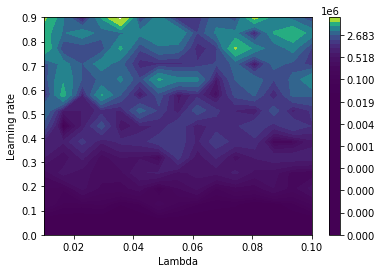

In [77]:
# Make a countourf plot
plt.contourf(M, N, adam_prop_opt[2], cmap="viridis", levels=np.logspace(0, 7, 50))
plt.colorbar()
plt.xlabel("Lambda")
plt.ylabel("Learning rate")
plt.show()